In [12]:
#This allows myltiple outputs from a single jupyter notebok cell:
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

In [13]:
%matplotlib inline
import pandas as pd
pd.__version__ #for the record

'2.1.3'

In [14]:
df=pd.read_csv('SPY_20110701_20120630_Bollinger.csv',index_col=0,parse_dates=True)
df.shape
df.head(3)
df.tail(3)
df.isnull().sum()
df.info()

(252, 9)

,Open,High,Low,Close,Adj Close,Volume,UpperB,LowerB,PercentB
Date,,,,,,,,,
2011-07-01,132.089996,134.100006,131.779999,133.919998,117.161659,202385700,132.373927,125.316073,1.219057
2011-07-05,133.779999,134.080002,133.389999,133.809998,117.065437,165936000,133.254297,124.912703,1.066618
2011-07-06,133.490005,134.139999,133.110001,133.970001,117.205429,143331600,134.040915,124.627085,0.992467


,Open,High,Low,Close,Adj Close,Volume,UpperB,LowerB,PercentB
Date,,,,,,,,,
2012-06-27,132.419998,133.429993,131.970001,133.169998,118.980804,108088000,136.447962,128.140042,0.605441
2012-06-28,132.289993,132.990005,131.279999,132.789993,118.641281,169242100,136.500761,128.219241,0.551922
2012-06-29,135.199997,136.270004,134.850006,136.100006,121.598610,212250900,136.721010,128.792993,0.921670


Open         0
High         0
Low          0
Close        0
Adj Close    0
Volume       0
UpperB       0
LowerB       0
PercentB     0
dtype: int64

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 252 entries, 2011-07-01 to 2012-06-29
Data columns (total 9 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Open       252 non-null    float64
 1   High       252 non-null    float64
 2   Low        252 non-null    float64
 3   Close      252 non-null    float64
 4   Adj Close  252 non-null    float64
 5   Volume     252 non-null    int64  
 6   UpperB     252 non-null    float64
 7   LowerB     252 non-null    float64
 8   PercentB   252 non-null    float64
dtypes: float64(8), int64(1)
memory usage: 19.7 KB


In [15]:
pip install https://github.com/matplotlib/mpl_finance/archive/master.zip

  Using cached https://github.com/matplotlib/mpl_finance/archive/master.zip
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
Note: you may need to restart the kernel to use updated packages.


In [16]:
pip install --upgrade mplfinance

Note: you may need to restart the kernel to use updated packages.


'0.12.10b0'

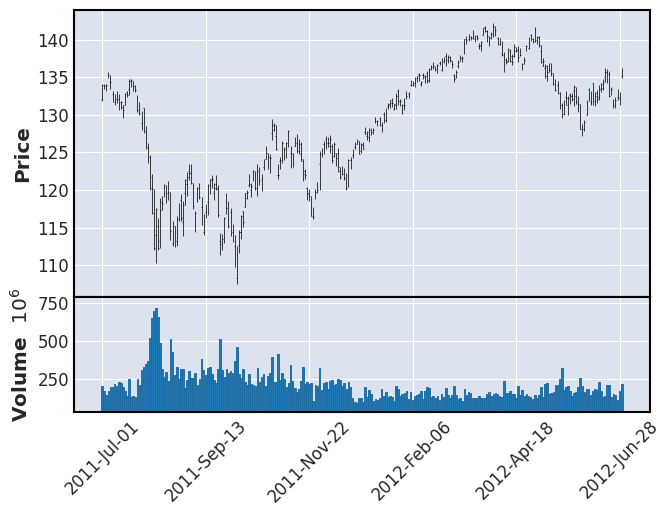

In [17]:
import mplfinance as mpf
mpf.__version__
mpf.plot(df,volume=True)

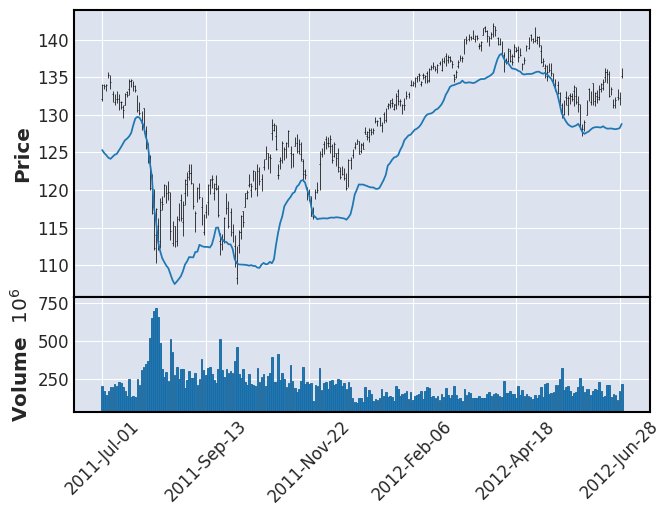

In [18]:
apdict=mpf.make_addplot(df['LowerB'])
mpf.plot(df,volume=True,addplot=apdict)

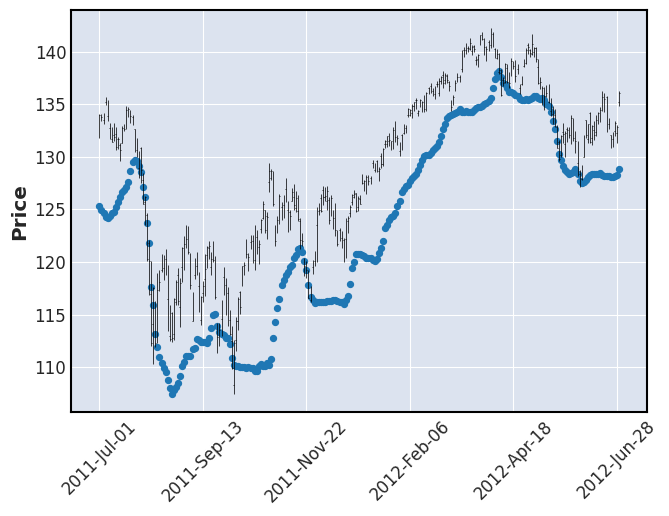

In [19]:
apd=mpf.make_addplot(df['LowerB'],type='scatter')
mpf.plot(df,addplot=apd)

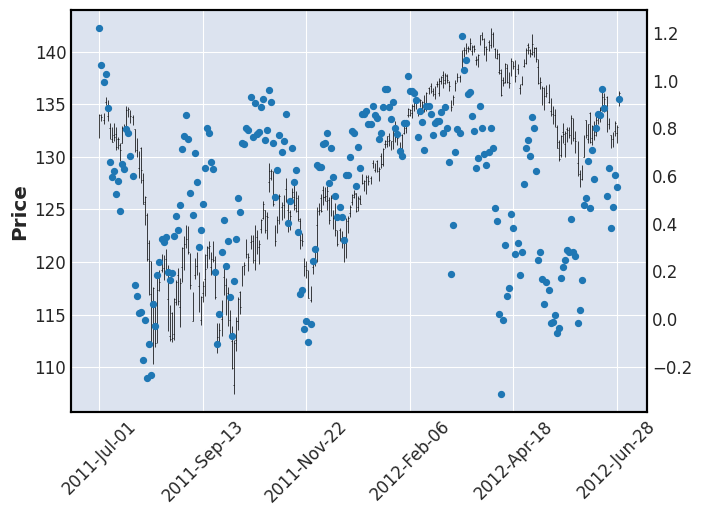

In [21]:
apd=mpf.make_addplot(df['PercentB'],type='scatter')
mpf.plot(df,addplot=apd)

In [ ]:
def percentB_belowzero(PercentB,price):
    import numpy as np 
    signal=[]
    previous=-1.0
    for data,value in PercentB.iteritems():
        if value<0 and previous >= 0:
            signal.append(price[data]*0.99)
        else:
            signal.append(np.nan)